# Pivot Tables



## Related files:
- dc_bikes_clean.csv

## Import package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Read data

In [2]:
df = pd.read_csv('../data/dc_bikes_clean.csv', parse_dates = True, index_col = 0)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,day,day_name,hour,minute,part_of_the_day
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,2011,1,1,1,Saturday,0,0,night
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,2011,1,1,1,Saturday,1,0,night
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2011,1,1,1,Saturday,2,0,night
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,2011,1,1,1,Saturday,3,0,night
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,2011,1,1,1,Saturday,4,0,night


# Project
- Use pivot_table to create a pivot table of traffic density over weekdays and/or hours.
- Identify confounding factors in the dataset (e.g. workdays vs weekdays). 
- Create a notebook with your solution.

## Traffic density per day

,day_name,count
0,Friday,200.249698
1,Monday,175.096410
2,Saturday,194.396497
3,Sunday,182.842126
4,Thursday,198.999595
5,Tuesday,180.951080
6,Wednesday,187.644040


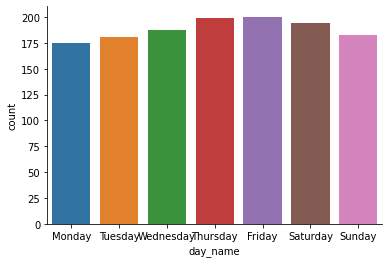

In [3]:
df_subset = df.pivot_table(
    # columns = 'day_name',
    index = 'day_name',
    values = 'count',
    aggfunc = 'mean').reset_index()

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data = df_subset,
           x = 'day_name',
           y = 'count',
           order = order)
sns.despine();

df_subset

## Traffic density per hour

,hour,count
0,0,54.721763
1,1,33.743094
2,2,23.051748
3,3,12.229555
4,4,7.236729


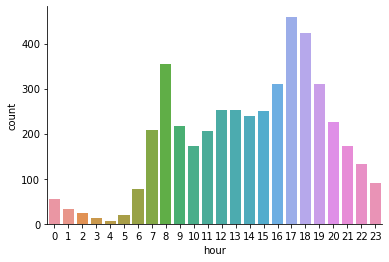

In [4]:
df_subset = df.pivot_table(
    # columns = 'day_name',
    index = 'hour',
    values = 'count',
    aggfunc = 'mean').reset_index()

sns.barplot(data = df_subset,
           x = 'hour',
           y = 'count')
sns.despine();

df_subset.head()

---
# ADDITIONAL ANALYSIS

## WHO:

## Total rentals per month (registered and casual users)

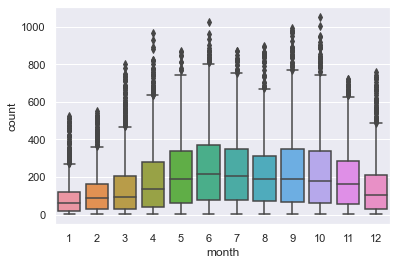

In [5]:
sns.set_theme(style = 'darkgrid')
sns.boxplot(data = df, x = 'month', y = 'count');

## Total rentals per month - split by user

### Barplot unstacked

In [6]:
# melting casual and registered riders in one dataframe, then summing up the values per month and have the sum of rentals per user per month
df_subset = df.melt(id_vars = 'month',
                             value_vars = ['casual', 'registered'],
                             var_name = 'user',
                             value_name = 'value')
df_subset = df_subset.groupby(['month','user'])[['value']].sum().reset_index()
df_subset

,month,user,value
0,1,casual,7252.0
1,1,registered,72632.0
2,2,casual,9297.0
3,2,registered,89816.0
4,3,casual,25056.0
5,3,registered,108445.0
6,4,casual,39813.0
7,4,registered,127589.0
8,5,casual,41285.0
9,5,registered,158862.0


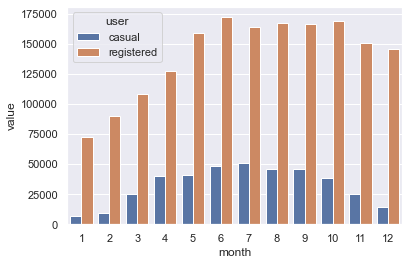

In [7]:
# plot
bar1 = sns.barplot(data=df_subset, x="month",  y="value", hue = 'user')

### Barplot stacked

In [8]:
# create subset
df_subset = df.pivot_table(
    # columns = 'month',
    index = 'month',
    values = ['casual', 'registered'],
    aggfunc = 'sum') 

# add columns for relative percentage, then drop the casuals and registered absolute figures so the barplot will only take the relative figures
df_subset['relative_casual'] = df_subset['casual']/(df_subset['casual'] + df_subset['registered'])
df_subset['relative_registered'] = 1 - df_subset['relative_casual']
df_subset.drop(columns = ['casual', 'registered'], inplace = True)
df_subset

,relative_casual,relative_registered
month,,
1,0.090782,0.909218
2,0.093802,0.906198
3,0.187684,0.812316
4,0.237829,0.762171
5,0.206273,0.793727
6,0.220058,0.779942
7,0.237386,0.762614
8,0.214832,0.785168
9,0.215975,0.784025


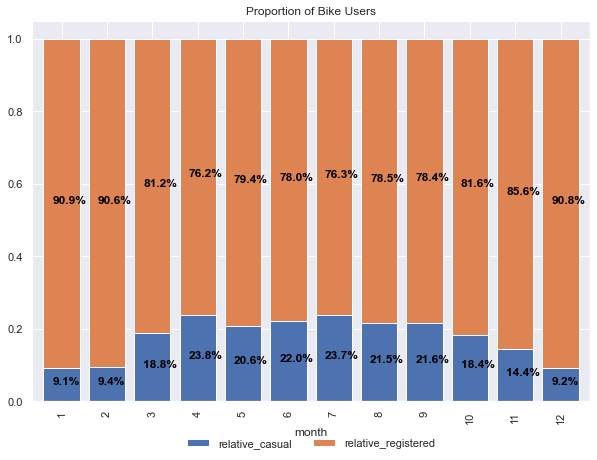

In [9]:
# stacked barplot
sns.set_theme(style = 'darkgrid')
df_subset.plot(kind = 'bar', stacked = True, figsize = (10, 7), width = 0.8, title = 'Proportion of Bike Users')
plt.legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.15), ncol = 2, frameon = False)


# percentage labels
for n, x in enumerate([*df_subset.index.values]):
    for (proportion, y_loc) in zip(df_subset.loc[x],
                                   df_subset.loc[x].cumsum()):
        plt.text(x = n-0.20,
                 y = (y_loc - proportion) + (proportion / 2),
                 s = f'{np.round(proportion * 100, 1)}%',
                 color = "black",
                 fontsize = 12,
                 fontweight = "bold")

## WHEN:

## Traffic density per part of the day per day

#### Without using pivot/melt/pivot table

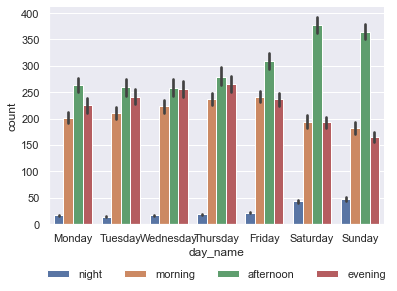

In [10]:
sns.set_theme(style = 'darkgrid')
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.barplot(data = df,
           x = 'day_name',
           y = 'count',
           hue = 'part_of_the_day',
            order = order)
sns.despine()
sns.move_legend(ax, 'lower center', bbox_to_anchor = (0.5, -0.3), frameon = False, ncol = 4, title = None);

#### Using pivot/melt/pivot table

In [11]:
# tranform to pivot table
df_subset = df.pivot_table(
    columns = 'part_of_the_day',
    index = 'day_name',
    values = 'count',
    aggfunc = 'mean').reset_index()

df_subset

part_of_the_day,day_name,afternoon,evening,morning,night
0,Friday,309.928846,236.596154,241.592033,21.695935
1,Monday,263.532692,224.788462,201.754121,16.280066
2,Saturday,377.735238,192.725962,193.853061,43.423567
3,Sunday,364.678095,164.331746,182.130969,47.205212
4,Thursday,279.253385,265.424679,236.603329,18.288998
5,Tuesday,259.105769,241.427885,210.194406,13.801347
6,Wednesday,258.269231,255.388350,222.958791,16.379310


,day_name,day_time,count_mean
0,Friday,morning,241.592033
1,Monday,morning,201.754121
2,Saturday,morning,193.853061
3,Sunday,morning,182.130969
4,Thursday,morning,236.603329
5,Tuesday,morning,210.194406
6,Wednesday,morning,222.958791
7,Friday,afternoon,309.928846
8,Monday,afternoon,263.532692
9,Saturday,afternoon,377.735238


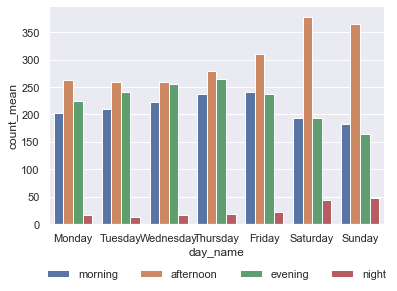

In [12]:
# melt the pivot table
df_sub = df_subset.melt(id_vars = ['day_name'],
                             value_vars = ['morning', 'afternoon', 'evening', 'night'],
                             var_name = 'day_time',
                             value_name = 'count_mean')


# plot
sns.set_theme(style = 'darkgrid')
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.barplot(data = df_sub, 
                 y = 'count_mean', 
                 x = 'day_name', 
                 hue = 'day_time', 
                 order = order , 
                 dodge = True)
sns.despine()
sns.move_legend(ax, 'lower center', bbox_to_anchor = (0.5, -0.3), frameon = False, ncol = 4, title = None);

df_sub

## Traffic density per season per working day

### Without using pivot/melt/pivot table ---> using `groupby` instead

In [13]:
# groupby method
agg_dict = {'count': 'mean'}
df_grouped = df.groupby(['workingday','season']).agg(agg_dict).reset_index()
df_grouped

,workingday,season,count
0,0,1,96.572514
1,0,2,218.482502
2,0,3,238.562362
3,0,4,202.173246
4,1,1,114.172870
5,1,2,200.350620
6,1,3,231.943649
7,1,4,203.563897


In [14]:
# vlookup dictionary working day
df_wd = pd.DataFrame({'workingday': [0,1], 'working_day': ['yes', 'no']})
df_wd

,workingday,working_day
0,0,yes
1,1,no


In [15]:
# vlookup dictionary season
df_ssn = pd.DataFrame({'season': [1,2,3,4], 'seasons': ['spring', 'summer', 'fall', 'winter']})
df_ssn

,season,seasons
0,1,spring
1,2,summer
2,3,fall
3,4,winter


In [16]:
# left merge working day
df_merged = pd.merge(left = df_grouped, right = df_wd, how = 'left', on = 'workingday').drop(columns = 'workingday')

# left merge season (by overwriting df_merged immediately)
df_merged = pd.merge(left = df_merged, right = df_ssn, how = 'left', on = 'season').drop(columns = 'season').round(0)
df_merged

,count,working_day,seasons
0,97.0,yes,spring
1,218.0,yes,summer
2,239.0,yes,fall
3,202.0,yes,winter
4,114.0,no,spring
5,200.0,no,summer
6,232.0,no,fall
7,204.0,no,winter


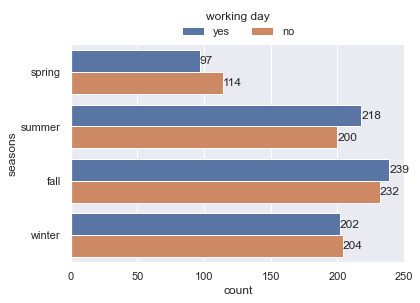

In [17]:
# plot
sns.set_theme(style = 'darkgrid')
ax = sns.barplot(data = df_merged, x = 'count', y = 'seasons', hue = 'working_day')
sns.despine()
sns.move_legend(ax, 'upper center', bbox_to_anchor = (0.5, 1.2), frameon = False, ncol = 2, title = 'working day')

# value labels
for i in ax.containers:
    ax.bar_label(i,);

### Using pivot/melt/pivot table

In [18]:
# tranform to pivot table
df_subset = df.pivot_table(
    columns = 'season',
    index = 'workingday',
    values = 'count',
    aggfunc = 'mean').reset_index()

df_subset

season,workingday,1,2,3,4
0,0,96.572514,218.482502,238.562362,202.173246
1,1,114.172870,200.350620,231.943649,203.563897


In [19]:
# melt the pivot table
df_sub = df_subset.melt(id_vars = ['workingday'],
                             value_vars = [1,2,3,4],
                             var_name = 'season',
                             value_name = 'count_mean')
df_sub

,workingday,season,count_mean
0,0,1,96.572514
1,1,1,114.172870
2,0,2,218.482502
3,1,2,200.350620
4,0,3,238.562362
5,1,3,231.943649
6,0,4,202.173246
7,1,4,203.563897


In [20]:
# vlookup dictionary working day
df_wd = pd.DataFrame({'workingday': [0,1], 'working_day': ['yes', 'no']})

# vlookup dictionary season
df_ssn = pd.DataFrame({'season': [1,2,3,4], 'seasons': ['spring', 'summer', 'fall', 'winter']})

# left merge working day
df_merge = pd.merge(left = df_sub, right = df_wd, how = 'left', on = 'workingday').drop(columns = 'workingday')

# left merge season (by overwriting df_merged immediately)
df_merge = pd.merge(left = df_merge, right = df_ssn, how = 'left', on = 'season').drop(columns = 'season')
df_merge = df_merge.round(0)
df_merge

,count_mean,working_day,seasons
0,97.0,yes,spring
1,114.0,no,spring
2,218.0,yes,summer
3,200.0,no,summer
4,239.0,yes,fall
5,232.0,no,fall
6,202.0,yes,winter
7,204.0,no,winter


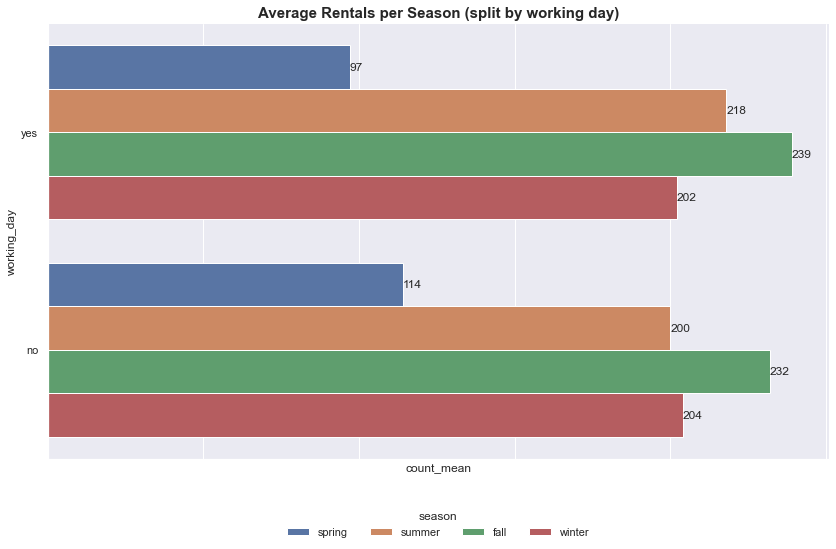

In [21]:
# plot
plt.figure(figsize = (14,8))
sns.set_theme(style = 'darkgrid')
ax = sns.barplot(data = df_merge, x = 'count_mean', y = 'working_day', hue = 'seasons', dodge = True)
ax.set_title('Average Rentals per Season (split by working day)', fontsize = 15, weight = 'bold')
sns.despine()
sns.move_legend(ax, 'upper center', bbox_to_anchor = (0.5, -0.1), frameon = False, ncol = 4, title = 'season');
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

# value labels
for i in ax.containers:
    ax.bar_label(i,)

## UNDER WHAT CONDITIONS:

## Average bike rentals per month according to weather

In [22]:
df_subset = df.pivot_table(
    columns = 'weather',
    index = ['month'],
    values = 'count',
    aggfunc = 'mean').reset_index()

df_subset

weather,month,1,2,3,4
0,1,98.865169,74.362150,40.481481,71.333333
1,2,118.356148,110.687135,88.065693,NaN
2,3,155.874862,134.714286,56.968992,NaN
3,4,217.787649,146.470430,93.049296,NaN
4,5,252.702331,200.204489,137.160839,NaN
5,6,260.044831,244.447273,153.569444,NaN
6,7,237.769625,217.279528,172.387097,NaN
7,8,222.202578,233.407285,185.505747,NaN
8,9,262.937429,200.869565,134.402778,NaN
9,10,237.354286,231.016990,149.591463,NaN


#### Lineplot

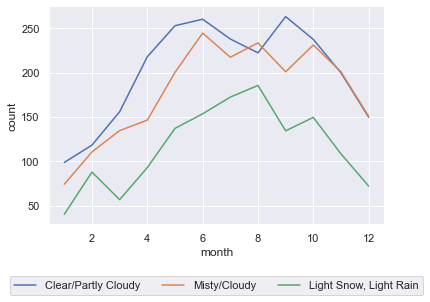

In [23]:
# plot
sns.set_theme(style = 'darkgrid')


ax = sns.lineplot(data = df_subset, x = 'month', y = 1)
ax = sns.lineplot(data = df_subset, x = 'month', y = 2)
ax = sns.lineplot(data = df_subset, x = 'month', y = 3)



ax.legend(['Clear/Partly Cloudy', 'Misty/Cloudy', 'Light Snow, Light Rain'])
sns.move_legend(ax, 'lower center', bbox_to_anchor = (0.5, -0.35), frameon = True, ncol = 3, title = None)
sns.despine()
ax.set(xlabel='month', ylabel='count');

#### Displot (kde)

weather         Clear/Partly Cloudy  Misty/Cloudy  Light Snow, Light Rain
year month day                                                           
2011 1     1                  305.0         608.0                    72.0
           2                  165.0         417.0                   219.0
           3                 1349.0           NaN                     NaN
           4                 1520.0          42.0                     NaN
           5                 1600.0           NaN                     NaN
...                             ...           ...                     ...
2012 12    27                 633.0         404.0                     7.0
           28                 417.0         820.0                     NaN
           29                 217.0         464.0                   139.0
           30                 833.0         115.0                     NaN
           31                 489.0        1416.0                     NaN

[731 rows x 3 columns]

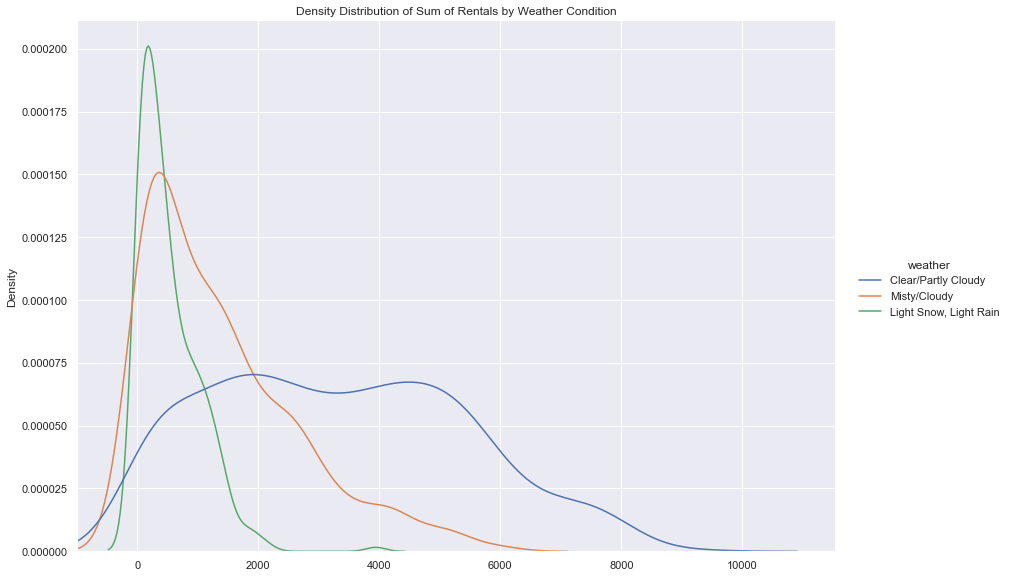

In [24]:
# pivot table : sum
df_subset = df.pivot_table(
    columns = 'weather',
    index = ['year', 'month', 'day'],
    values = 'count',
    aggfunc = 'sum'
)

df_subset.drop(columns = 4, inplace = True)
df_subset.rename(columns = {1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy', 3: 'Light Snow, Light Rain'}, inplace = True)


# plot
sns.set_theme(style = 'darkgrid')
ax = sns.displot(df_subset, 
                 # col = 'year',
                 # multiple = 'stack',
                 height=8,
                 aspect=1.5,
                 kind = 'kde',
                )
ax.set(title = 'Density Distribution of Sum of Rentals by Weather Condition')
plt.xlim(-1000)
df_subset

weather         Clear/Partly Cloudy  Misty/Cloudy  Light Snow, Light Rain
year month day                                                           
2011 1     1              25.416667     60.800000                   36.00
           2              27.500000     34.750000                   43.80
           3              61.318182           NaN                     NaN
           4              69.090909     42.000000                     NaN
           5              69.565217           NaN                     NaN
...                             ...           ...                     ...
2012 12    27             63.300000     33.666667                    3.50
           28             59.571429     48.235294                     NaN
           29             72.333333     27.294118                   34.75
           30             52.062500     14.375000                     NaN
           31             40.750000    118.000000                     NaN

[731 rows x 3 columns]

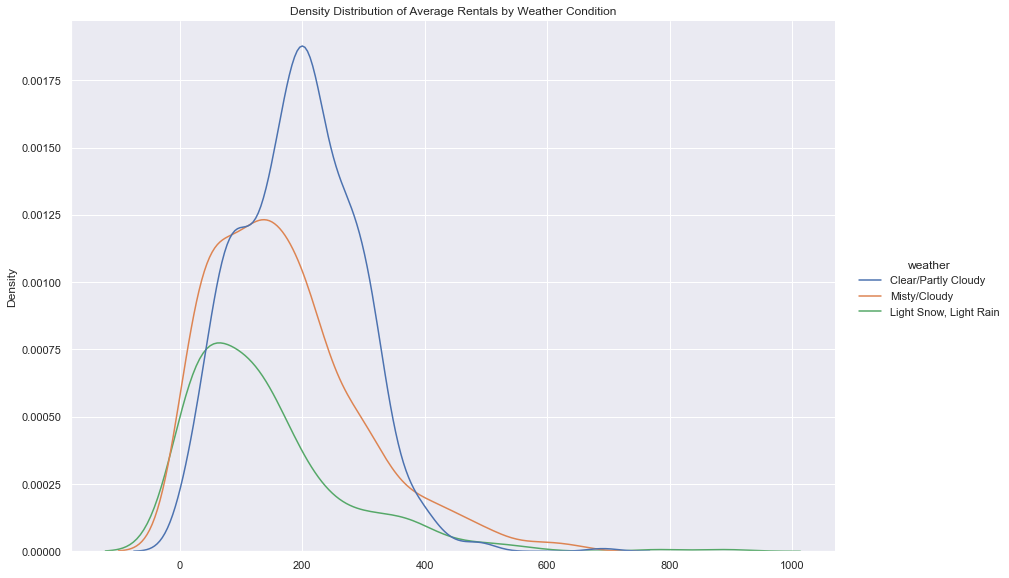

In [25]:
# pivot table : mean
df_subset = df.pivot_table(
    columns = 'weather',
    index = ['year', 'month', 'day'],
    values = 'count',
    aggfunc = 'mean'
)

df_subset.drop(columns = [4], inplace = True)
df_subset.rename(columns = {1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy', 3: 'Light Snow, Light Rain'}, inplace = True)


# plot
sns.set_theme(style = 'darkgrid')
ax = sns.displot(df_subset, 
                 # col = 'year',
                 # multiple = 'stack',
                 height=8,
                 aspect=1.5,
                 kind = 'kde')
ax.set(title = 'Density Distribution of Average Rentals by Weather Condition')
df_subset

season          Spring  Summer  Fall  Winter
year month day                              
2011 1     1     985.0     NaN   NaN     NaN
           2     801.0     NaN   NaN     NaN
           3    1349.0     NaN   NaN     NaN
           4    1562.0     NaN   NaN     NaN
           5    1600.0     NaN   NaN     NaN
...                ...     ...   ...     ...
2012 12    27   1044.0     NaN   NaN     NaN
           28   1237.0     NaN   NaN     NaN
           29    820.0     NaN   NaN     NaN
           30    948.0     NaN   NaN     NaN
           31   1905.0     NaN   NaN     NaN

[731 rows x 4 columns]

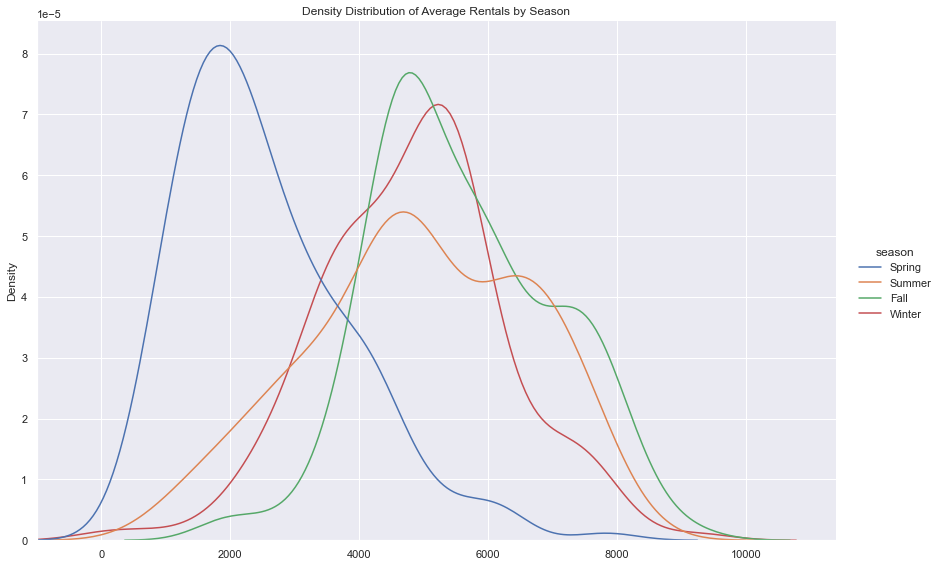

In [26]:
# pivot table : sum
df_subset = df.pivot_table(
    columns = 'season',
    index = ['year', 'month', 'day'],
    values = 'count',
    aggfunc = 'sum'
)


# df_subset.drop(columns = 4, inplace = True)
df_subset.rename(columns = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace = True)


# plot
sns.set_theme(style = 'darkgrid')
ax = sns.displot(df_subset, 
                 # col = 'year',
                 # multiple = 'stack',
                 height=8,
                 aspect=1.5,
                 kind = 'kde'
                )
ax.set(title = 'Density Distribution of Average Rentals by Season')
plt.xlim(-1000)
df_subset